# Multitask Performance

## Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -r /content/drive/MyDrive/Google_Colab/requirements.txt

In [ ]:
%cd /content/drive/MyDrive/Google_Colab

/content/drive/MyDrive/Google_Colab


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

import qsttoolkit as qst
import time

## Average Fidelity

In [ ]:
data = qst.data.optical_state_dataset(dim=32, data_dim=20, state_numbers=[1000, 1000, 1000, 1000, 1000, 1000, 0, 1000],       # Large numbers of GKP states take an intractable amount of time to produce, and are difficult to produce practically
                                      mixed_state_noise_level = 0.2,
                                      Gaussian_conv_ntherm = 0.0,
                                      affine_theta = 0.0,
                                      affine_x = 0.0,
                                      affine_y = 0.0,
                                      additive_Gaussian_stddev = 0.000,
                                      pepper_p = 0.00,
                                      salt_p = 0.0)

/content/drive/MyDrive/Google_Colab/qsttoolkit/data/state_batches.py:170: UserWarning: thermal states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the future.
  warnings.warn("thermal states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the future.")
/content/drive/MyDrive/Google_Colab/qsttoolkit/data/state_batches.py:365: UserWarning: Random states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the future.
  warnings.warn("Random states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the 

States generated
DataFrames initialized
Fock data generated
Coherent data generated
Thermal data generated
Num data generated
Binomial data generated
Cat data generated
GKP data generated
Random data generated
Dataset generated


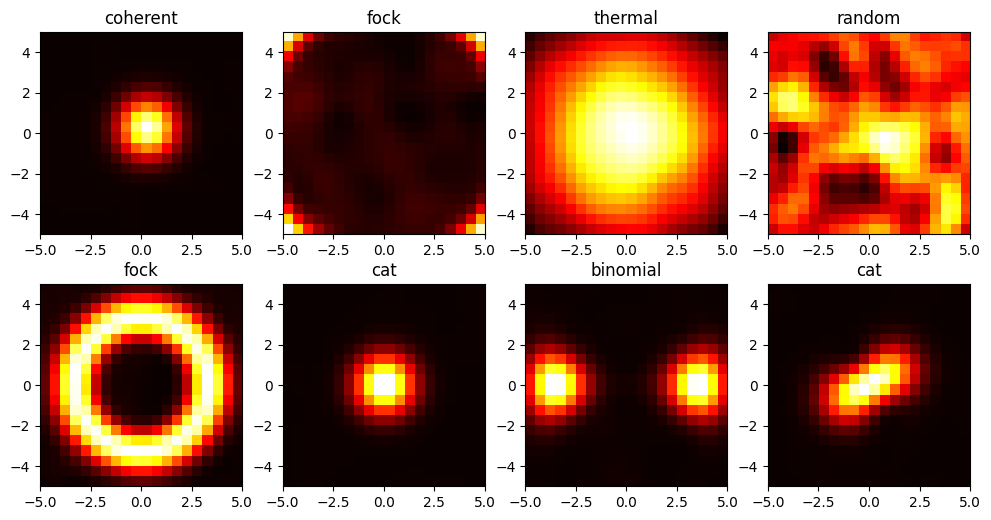

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(12, 6))
axs[0,0].imshow(data['Husimi-Q_function'][0], extent=[-5,5,-5,5], cmap='hot')
axs[0,0].set_title(data['label'][0])
axs[0,1].imshow(data['Husimi-Q_function'][1], extent=[-5,5,-5,5], cmap='hot')
axs[0,1].set_title(data['label'][1])
axs[0,2].imshow(data['Husimi-Q_function'][2], extent=[-5,5,-5,5], cmap='hot')
axs[0,2].set_title(data['label'][2])
axs[0,3].imshow(data['Husimi-Q_function'][3], extent=[-5,5,-5,5], cmap='hot')
axs[0,3].set_title(data['label'][3])
axs[1,0].imshow(data['Husimi-Q_function'][4], extent=[-5,5,-5,5], cmap='hot')
axs[1,0].set_title(data['label'][4])
axs[1,1].imshow(data['Husimi-Q_function'][5], extent=[-5,5,-5,5], cmap='hot')
axs[1,1].set_title(data['label'][5])
axs[1,2].imshow(data['Husimi-Q_function'][6], extent=[-5,5,-5,5], cmap='hot')
axs[1,2].set_title(data['label'][6])
axs[1,3].imshow(data['Husimi-Q_function'][7], extent=[-5,5,-5,5], cmap='hot')
axs[1,3].set_title(data['label'][7])
plt.show()

In [ ]:
X = data['Husimi-Q_function']

y_class_raw = data['label']
label_encoder = LabelEncoder()
y_class_int = label_encoder.fit_transform(y_class_raw)

y_reg_real = data['state_parameter'].apply(lambda x: x.real)
y_reg_imag = data['state_parameter'].apply(lambda x: x.imag)
y_reg = np.array([y_reg_real, y_reg_imag]).T

X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg, indices_train, indices_test = train_test_split(X, y_class_int, y_reg, range(len(X)), test_size=0.2, random_state=42)
y_train = {"classification_output": y_train_class, "regression_output": y_train_reg}    # Dictionaries to handle both regression and classification tasks
y_test = {"classification_output": y_test_class, "regression_output": y_test_reg}
data_dim = X_train[0].shape[0]
X_train = np.array([x for x in X_train]).reshape(-1, data_dim, data_dim, 1)
X_test = np.array([x for x in X_test]).reshape(-1, data_dim, data_dim, 1)

In [ ]:
epochs = 1000
splits = 100
step = int(epochs/splits)
runs = 5              # Original script crashed after 3 runs, so 2 more were run to complete the data. This notebook shows the training for those final 2 runs.

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a squ

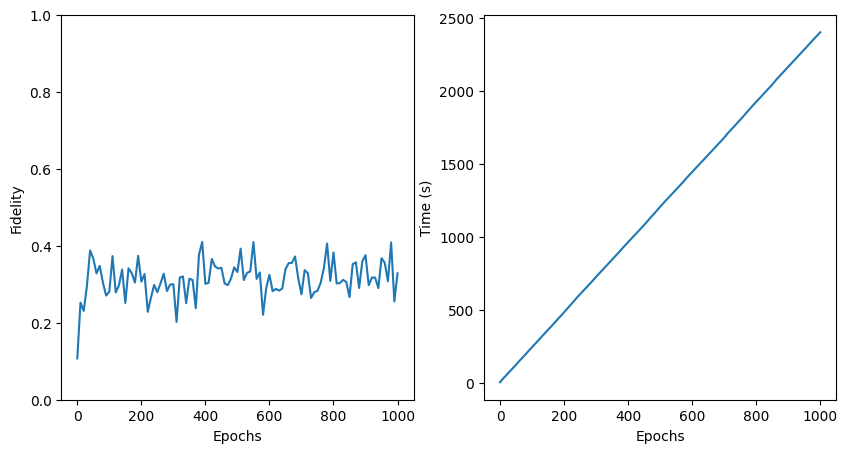

Run 1 time: 40.0140881061554 minutes, estimated time to completion: 0.6669014704889721 hours
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square roo

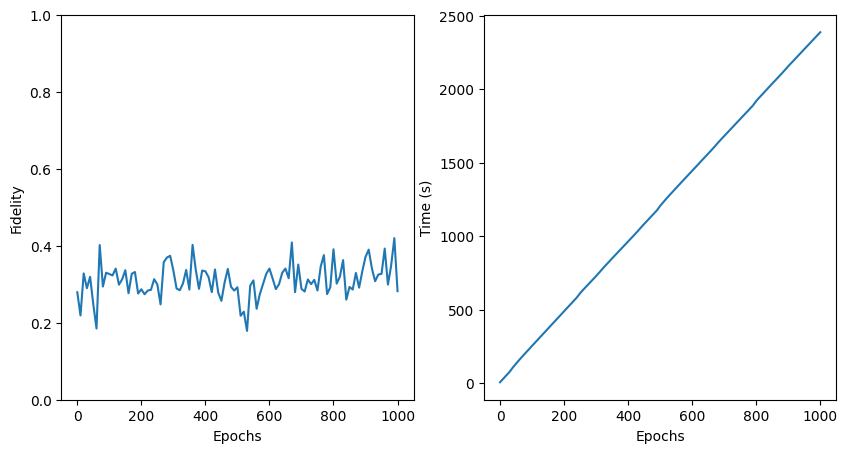

Run 2 time: 39.79658611615499 minutes, estimated time to completion: 0.0 hours


In [ ]:
results = pd.DataFrame({'epochs': range(0, epochs+step, step)})

for run in range(runs):
    loop_start_time = time.time()
    fidelities = []
    times = []

    multitask_model = qst.tomography.MultitaskQuantumStateTomography(X_train=X_train,
                                                                      X_test=X_test,
                                                                      y_train=y_train,
                                                                      y_test=y_test,
                                                                      label_encoder=label_encoder,
                                                                      early_stopping_patience=100,
                                                                      lr_scheduler_factor=0.5,
                                                                      lr_scheduler_patience=5)

    reconstructor = qst.tomography.StateReconstructor()
    predicted_labels, predicted_state_parameters = multitask_model.infer(X_test)
    reconstructor.add_data(true_labels = label_encoder.inverse_transform(y_test['classification_output']),
                          predicted_labels = predicted_labels,
                          true_state_parameters = y_test['regression_output'],
                          predicted_state_parameters = predicted_state_parameters,
                          true_dms = data['density_matrix'].iloc[indices_test].reset_index(drop=True))
    reconstructor.restrict_parameters(fock_n_range=[0,31], binomial_S_range=[1,10])
    reconstructor.reconstruct()
    reconstructor.calculate_fidelities()
    fidelities.append(reconstructor.predictions_df[reconstructor.predictions_df['true_label'] == 'num'].fidelity.mean())
    times.append(time.time() - loop_start_time)

    for i in range(splits):
        multitask_model.train(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999),
                              classification_loss='sparse_categorical_crossentropy',
                              regression_loss='mse',
                              classification_loss_weight=1.0,
                              regression_loss_weight=1.0,
                              classification_metric='accuracy',
                              regression_metric='mse',
                              epochs=step,
                              batch_size=32,
                              validation_split=0.2,
                              verbose=0)
        reconstructor = qst.tomography.StateReconstructor()
        predicted_labels, predicted_state_parameters = multitask_model.infer(X_test)
        reconstructor.add_data(true_labels = label_encoder.inverse_transform(y_test['classification_output']),
                              predicted_labels = predicted_labels,
                              true_state_parameters = y_test['regression_output'],
                              predicted_state_parameters = predicted_state_parameters,
                              true_dms = data['density_matrix'].iloc[indices_test].reset_index(drop=True))
        reconstructor.restrict_parameters(fock_n_range=[0,31], binomial_S_range=[1,10])
        reconstructor.reconstruct()
        reconstructor.calculate_fidelities()
        fidelities.append(reconstructor.predictions_df[reconstructor.predictions_df['true_label'] == 'num'].fidelity.mean())
        times.append(time.time() - loop_start_time)

    results[f'num_fidelities_{run}'] = fidelities
    results[f'num_times_{run}'] = times

    _, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].plot(results['epochs'], fidelities)
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Fidelity')
    axs[0].set_ylim([0, 1])
    axs[1].plot(results['epochs'], times)
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Time (s)')
    plt.show()
    results.to_csv('Multitask_num_fidelities_2.csv')
    print(f"Run {run+1} time: {(time.time() - loop_start_time)/60} minutes, estimated time to completion: {(time.time() - loop_start_time) * (runs - run - 1) / 3600} hours")

In [ ]:
results.to_csv('Multitask_num_fidelities_2.csv')

## Zeroth epoch estimate (now included in the above simulation)

In [ ]:
data = qst.data.optical_state_dataset(dim=32, data_dim=20, state_numbers=[1000, 1000, 1000, 1000, 1000, 1000, 0, 1000],       # Large numbers of GKP states take an intractable amount of time to produce, and are difficult to produce practically
                                      mixed_state_noise_level = 0.2,
                                      Gaussian_conv_ntherm = 0.0,
                                      affine_theta = 0.0,
                                      affine_x = 0.0,
                                      affine_y = 0.0,
                                      additive_Gaussian_stddev = 0.000,
                                      pepper_p = 0.00,
                                      salt_p = 0.0)

/content/drive/MyDrive/Google_Colab/qsttoolkit/data/state_batches.py:170: UserWarning: thermal states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the future.
  warnings.warn("thermal states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the future.")
/content/drive/MyDrive/Google_Colab/qsttoolkit/data/state_batches.py:365: UserWarning: Random states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the future.
  warnings.warn("Random states are currently initialized as density matrices. Calling the product of the .density_matrices() method is equivalent to simply calling .states() attribute. This may change in the 

States generated
DataFrames initialized
Fock data generated
Coherent data generated
Thermal data generated
Num data generated
Binomial data generated
Cat data generated
GKP data generated
Random data generated
Dataset generated


In [ ]:
X = data['Husimi-Q_function']

y_class_raw = data['label']
label_encoder = LabelEncoder()
y_class_int = label_encoder.fit_transform(y_class_raw)

y_reg_real = data['state_parameter'].apply(lambda x: x.real)
y_reg_imag = data['state_parameter'].apply(lambda x: x.imag)
y_reg = np.array([y_reg_real, y_reg_imag]).T

X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg, indices_train, indices_test = train_test_split(X, y_class_int, y_reg, range(len(X)), test_size=0.2, random_state=42)
y_train = {"classification_output": y_train_class, "regression_output": y_train_reg}    # Dictionaries to handle both regression and classification tasks
y_test = {"classification_output": y_test_class, "regression_output": y_test_reg}
data_dim = X_train[0].shape[0]
X_train = np.array([x for x in X_train]).reshape(-1, data_dim, data_dim, 1)
X_test = np.array([x for x in X_test]).reshape(-1, data_dim, data_dim, 1)

In [ ]:
runs = 5

In [ ]:
zeroth_fidelities = []

for run in range(runs):
    multitask_model = qst.tomography.MultitaskQuantumStateTomography(X_train=X_train,
                                                                      X_test=X_test,
                                                                      y_train=y_train,
                                                                      y_test=y_test,
                                                                      label_encoder=label_encoder)
    reconstructor = qst.tomography.StateReconstructor()

    predicted_labels, predicted_state_parameters = multitask_model.infer(X_test)

    reconstructor.add_data(true_labels = label_encoder.inverse_transform(y_test['classification_output']),
                          predicted_labels = predicted_labels,
                          true_state_parameters = y_test['regression_output'],
                          predicted_state_parameters = predicted_state_parameters,
                          true_dms = data['density_matrix'].iloc[indices_test].reset_index(drop=True))
    reconstructor.restrict_parameters(fock_n_range=[0,31], binomial_S_range=[1,10])
    reconstructor.reconstruct()
    reconstructor.calculate_fidelities()
    zeroth_fidelities.append(reconstructor.predictions_df[reconstructor.predictions_df['true_label'] == 'num'].fidelity.mean())


44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 144ms/step
Failed to find a square root.
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 260ms/step
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a square root.
Failed to find a 

In [ ]:
zeroth_fidelities

[0.032594468933585269794,
 0.14325429096328112018,
 0.48524906449562113885,
 0.21851878531080239439,
 0.10674841335317350565]

In [ ]:
results = pd.DataFrame({'zeroth_fidelities': zeroth_fidelities})
results.to_csv('Multitask_zeroth_fidelities.csv')